## Imports

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
train = pd.read_csv('../datasets/Selected_train_data.csv')
test = pd.read_csv('../datasets/Selected_test_data1.csv')

In [104]:
train.head()

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500


In [30]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predict = lr.predict(X_test)

In [68]:
r2_mod1train = lr.score(X_train, y_train)
r2_mod1train

0.7710228632896604

In [75]:
r2_mod1val = lr.score(X_val, y_val)

In [56]:
mae_mod1 = metrics.mean_absolute_error(y_test, y_predict)

In [57]:
rmse_mod1 = metrics.mean_squared_error(y_test, y_predict, squared=False)

In [40]:
preds = lr.predict(test.drop(columns=['FbathxHbath']))
preds.shape

(878,)

In [41]:
test['SalePrice'] = preds

In [42]:
#test['0'].astype(int)
#test.rename(columns={'0':'Id'}, inplace=True)
lr_submission = test[['Id', 'SalePrice']].set_index('Id')

In [43]:
lr_submission['SalePrice'] = lr_submission['SalePrice'].abs()


In [44]:
lr_submission

,SalePrice
Id,
2658,168896.466169
2718,207595.415056
2414,196377.360339
1989,111529.201270
625,183677.354017
...,...
1662,196179.037421
1234,199060.240590
1373,135338.843026


In [45]:
lr_submission.to_csv('../datasets/baseline.csv')

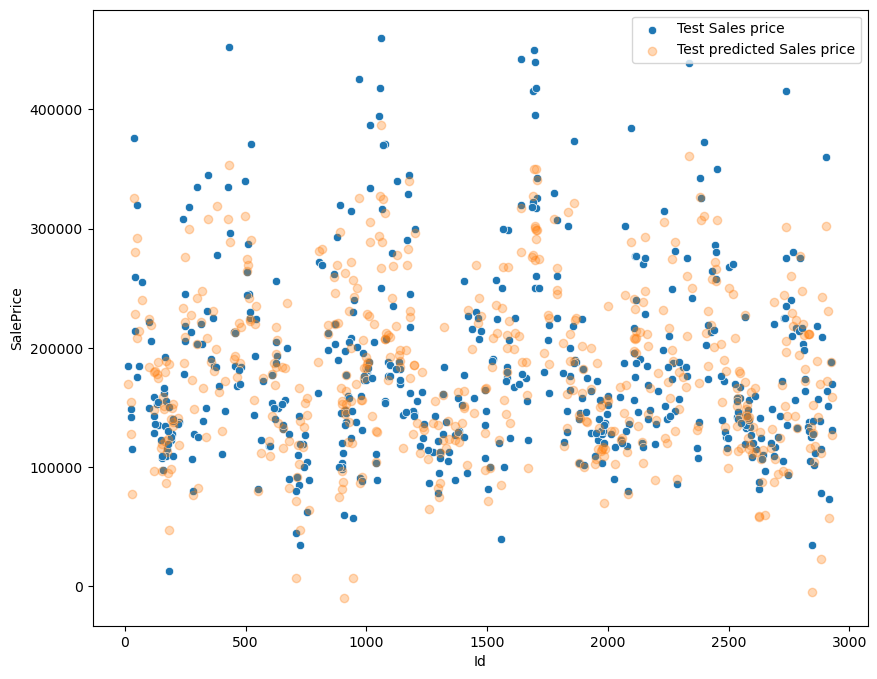

In [116]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = X_test['Id'], y = y_test, alpha=1, label='Test Sales price')
plt.scatter(x = X_test['Id'], y = y_predict, alpha=0.3, label='Test predicted Sales price')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('../Graphs/Baseline comparisons', dpi=1200)

### Adding baseline metrics to table

In [82]:
modelmetrics = pd.read_csv('../datasets/Metrics_for_Models.csv')

In [83]:
modelmetrics['R2 Score(train)'].replace(0, r2_mod1train, inplace=True)
modelmetrics['R2 Score(Val)'].replace(0, r2_mod1val, inplace=True)
modelmetrics['MAE'].replace(0, mae_mod1, inplace=True)
modelmetrics['RMSE'].replace(0, rmse_mod1, inplace=True)

In [84]:
modelmetrics

,Model,R2 Score(train),R2 Score(Val),MAE,RMSE,Description
0,Mode 1,0.771023,0.835513,23307.513959,31779.748064,Baseline
1,Model 2,0.886713,0.852980,21157.810887,31094.158241,Poly
2,Model 3,0.777809,0.807667,25021.056681,35564.524098,Dropped Full Bath and Half Bath
3,Model 4,0.780299,0.811278,24684.392809,35229.123817,StandardScaled
4,Model 5,0.885289,0.871826,19836.248501,28053.375859,Poly and SC
5,Model 6,0.880983,0.877115,19523.526618,27468.513989,RidgeCv


In [85]:
modelmetrics.to_csv('../datasets/Metrics_for_Models.csv', index= False)